# Day 09. Exercise 02
# Metrics

## 0. Imports

In [9]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [10]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
X = df

In [11]:
y = pd.read_csv('../data/dayofweek.csv')['dayofweek']
y

0       4
1       4
2       4
3       4
4       4
       ..
1681    3
1682    3
1683    3
1684    3
1685    3
Name: dayofweek, Length: 1686, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [13]:
svc = SVC(C=10, gamma='auto', probability=True, random_state=21)
svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', probability=True, random_state=21)

In [14]:
y_pred = svc.predict(X_test)
y_score = svc.predict_proba(X_test)

In [15]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'):.5f}")

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [16]:
dtc = DecisionTreeClassifier(max_depth=27, class_weight='balanced', random_state=21)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=27, random_state=21)

In [17]:
y_pred = dtc.predict(X_test)
y_score = dtc.predict_proba(X_test)

In [18]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'):.5f}")

accuracy is 0.89349
precision is 0.89511
recall is 0.89349
roc_auc is 0.93568


## 4. Random forest

1. The same task for random forest.

In [19]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=28, random_state=21)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=28, n_estimators=50, random_state=21)

In [20]:
y_pred = rfc.predict(X_test)
y_score = rfc.predict_proba(X_test)

In [21]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc is {roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'):.5f}")

accuracy is 0.92899
precision is 0.93009
recall is 0.92899
roc_auc is 0.99033


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

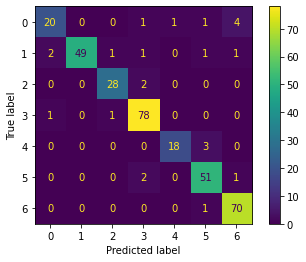

In [22]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

In [23]:
joblib.dump(rfc, 'model.joblib')

['model.joblib']

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [24]:
def calculate_metrics(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    y_score = estimator.predict_proba(X_test)
    return {'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo')}

In [25]:
calculate_metrics(rfc,  X_test, y_test)

{'accuracy': 0.9289940828402367,
 'precision': 0.9300865038851309,
 'recall': 0.9289940828402367,
 'roc_auc': 0.9903274757720744}